# AR + MA process

In [18]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

In [4]:
from statsmodels.tsa.stattools import acf, pacf

In [5]:
pal = sns.color_palette()

## Reusable functions

### Auto-regressive process

$ X_t = \phi_1 X_{t-1} + \epsilon_t $

In [13]:
def ar1(phi=0.9, n=1000, init=0):
    ts = [init]
    error = np.random.randn(n)
    for period in range(n):
        ts.append(error[period] + phi * ts[-1])
    return pd.Series(ts[1:], index=range(n))

$ X_t = \phi_1 X_{t-1} + \phi_2 X_{t - 2} + \epsilon_t $

In [14]:
def ar2(phi=0.9, phi2=-0.8, n=1000, init=0):
    ts = [init, init]
    error = np.random.randn(n)
    for period in range(2, n):
        ts.append(error[period] + phi * ts[-1] + phi2 * ts[-2])
    return pd.Series(ts[1:], index=range(1, n))

### Moving average process

$ X_t = \epsilon_t + \theta_1 \epsilon_{t - 1} $

In [6]:
def ma1(theta=0.5, n=100):
    'moving average 1'
    ts = []
    error = np.random.randn(n)
    for period in range(1, n):
        ts.append(error[period] + theta * error[period - 1])
    return pd.Series(ts[1:], index=range(1, n-1))

## Plot functions

<AxesSubplot:>

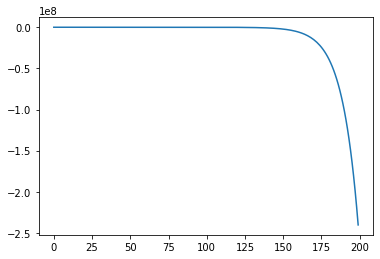

In [33]:
a1 = ar1(phi=1.1, n=200)
a1.plot()

<AxesSubplot:>

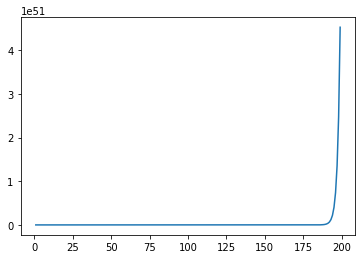

In [34]:
a2 = ar2(phi2=1.7, n=200)
a2.plot()

<AxesSubplot:>

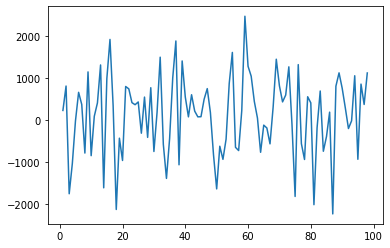

In [21]:
m1 = ma1(theta=-1000)
m1.plot()

## ACF and PACF

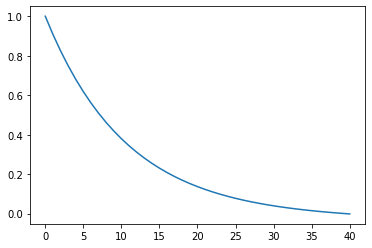

In [36]:
a1_acf = acf(a1, nlags=40, fft=False)
plt.plot(a1_acf)

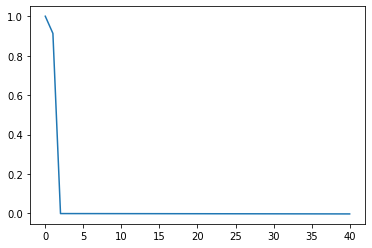

In [38]:
a1_acf = pacf(a1, nlags=40)
plt.plot(a1_acf)

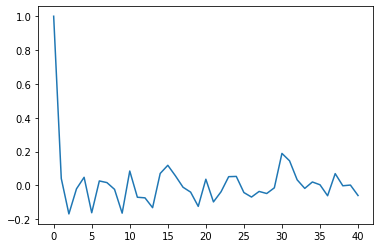

In [44]:
m1_acf = acf(m1, nlags=40, fft=False)
plt.plot(m1_acf)

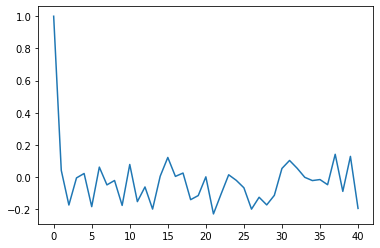

In [45]:
m1_pacf = pacf(m1, nlags=40)
plt.plot(m1_pacf)

## Airline passengers

In [16]:
airline_data_file = pathlib.Path('AirPassengers.csv')
air_passengers = pd.read_csv(
    airline_data_file, header=0, parse_dates=[0]).rename(columns={
    'Month': 'month',
    '#Passengers': 'passengers'
}).set_index('month')

air_passengers.shape

(144, 1)

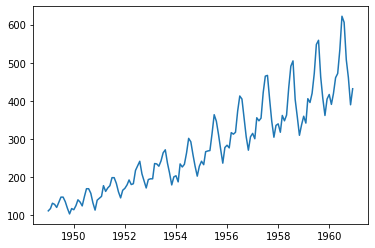

In [14]:
plt.plot(air_passengers)

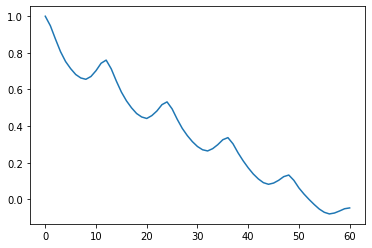

In [32]:
acf_result = stattools.acf(air_passengers, nlags=60, fft=False)
plt.plot(acf_result)

## Detrend the data

<AxesSubplot:xlabel='month'>

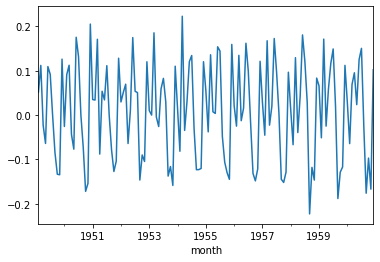

In [50]:
log_air_passengers = np.log(air_passengers.passengers)
log_air_passengers_diff = (
    log_air_passengers - log_air_passengers.shift()).dropna()
log_air_passengers_diff.plot()

In [65]:
acf_result = stattools.acf(log_air_passengers_diff.values, nlags=60, fft=False)

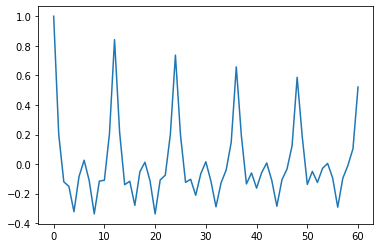

In [66]:
plt.plot(acf_result)